# Приоритизация гипотез для увеличения выручки интернет-магазина. Анализ А/В теста.

# Описание проекта

Есть список гипотез для увеличения выручки.


**Цель:**
* приоритизировать гипотезы 
* запустить A/B-тест  
* проанализировать результаты

## Часть 1. Приоритизация гипотез

### Описание данных

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Информация о колонках:**

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

# Импорт необходимых библиотек библиотек 

In [ ]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
from IPython.display import Image
from IPython.core.display import HTML 
pd.set_option('display.max_colwidth', 1000) # для выводов всех символов в записях
# импортируем нужные библиотеки для работы

### Изучение данных из файла

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
# откроем файл

In [ ]:
hypothesis.info()
hypothesis
# посмотрим на информацию и таблицу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Вывод:**

В датафрейме имеется 9 записей и 5 столбцов. Два типа данных: object и int. Видны нарушения стиля в названии столбцов

### Предобработка данных

In [ ]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns
# приведем название столбцов к нижнему регистру

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [ ]:
print('Количество дубликатов в таблице hypothesis =', hypothesis.duplicated().sum())
# проверим на дубликаты

Количество дубликатов в таблице hypothesis = 0


**Вывод:**

Привели столбцы к "хорошему" стилю, проверили на дубликаты

### Приоритизация гипотез

#### Фреймворк `ICE`

In [ ]:
Image(url="https://pictures.s3.yandex.net/resources/ice_score_2-27da3b9e-15cd-4f96-91a4-fefffd1d986e_1569198107.jpg")
# посмотрим на формулу ICE

`Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта

`Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так

`Efforts` — сколько стоит протестировать эту гипотезу.

In [ ]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
# расчет ICE(влияние, уверенность, усилия)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


**Вывод:**

Наиболее перспективными гипотезами являются:

* Запустить акцию, дающую скидку на товар в день рождения (8)
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

#### Фреймфорк `RICE`

In [ ]:
Image(url="https://pictures.s3.yandex.net/resources/rice_score_1634305501.png")
# посмотрим на формулу RICE

`Reach` — скольких пользователей затронет изменение, которое вы хотите внести

`Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта

`Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так

`Efforts` — сколько стоит протестировать эту гипотезу.

In [ ]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
# расчет RICE (охват, влияние, уверенность, усилия)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [ ]:
hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)
# сравним показатели

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


**Вывод:**

Наиболее перспективными гипотезами являются:

* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2)
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)

### Вывод:

Рекомендуется в первую очередь протестировать гипотезы:

* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)

Так как у нас интернет-магазин, параметр `Reach` имеет огромную ценность, так как это охват пользователей, а это очень важно. Именно поэтому меняется порядок приоритизации гипотез. И гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" имеет 10 баллов из 10, следовательно она затронет больше всех пользователей.

## Часть 2. Анализ A/B теста.

### Описание данных

Результаты А/В теста представлены в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Файл /datasets/orders.csv**

* transactionId — идентификатор заказа
* visitorId — идентификатор пользователя, совершившего заказ
* date — дата, когда был совершён заказ
* revenue — выручка заказа
* group — группа A/B-теста, в которую попал заказ


**Файл /datasets/visitors.csv**

* date — дата
* group — группа A/B-теста
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Изучение данных из файла

In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
# откроем файлы

In [ ]:
orders.info()
orders.head()
# посмотрим на информацию и таблицу orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
visitors.info()
visitors.head()
# посмотрим на информацию и таблицу visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Вывод:**

Таблица orders : 5 столбцов, 1197 записей, столбец с датой в формате object

Таблица visitors: 3 столбца, 62 записи, столбец с датой также в формате object

### Предобработка данных

#### Таблица orders

In [ ]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# приведем столбец date в формат даты

In [ ]:
orders.info()
# проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [ ]:
orders = orders.rename(columns={'transactionId': 'orderId', 'visitorId':'userId'})
# изменим название колонок для удобства

In [ ]:
orders.columns
# проверка результата

Index(['orderId', 'userId', 'date', 'revenue', 'group'], dtype='object')

In [ ]:
orders['group'].value_counts()
# посмотрим какое количество человек в разных группах

B    640
A    557
Name: group, dtype: int64

In [ ]:
print('Минимальная дата в исследовании = ', orders['date'].min())

Минимальная дата в исследовании =  2019-08-01 00:00:00


In [ ]:
print('Максимальная дата в исследовании = ', orders['date'].max())

Максимальная дата в исследовании =  2019-08-31 00:00:00


In [ ]:
print('Количество дубликатов в таблице orders =', orders.duplicated().sum())
# проверим на дубликаты

Количество дубликатов в таблице orders = 0


#### Таблица visitors

In [ ]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# приведем столбец date в формат даты

In [ ]:
visitors.info()
# проверим 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
visitors['group'].value_counts()
# посмотрим какое количество человек в разных группах

B    31
A    31
Name: group, dtype: int64

In [ ]:
print('Количество дубликатов в таблице visitors =', visitors.duplicated().sum())
# проверим на дубликаты

Количество дубликатов в таблице visitors = 0


#### Наличие пользователей в двух тестах одновременно

In [ ]:
repeat_users = orders.groupby('userId').agg({'group': 'nunique'})
repeat_users = repeat_users.query('group > 1')
repeat_users.count()
# группировка и подсчет пользователей в двух группах теста

group    58
dtype: int64

**Вывод:**

Провели преобработку двух предоставленных таблиц `orders` и `visitors`:

* привели в формат datetime столбцы с датами 
* проверили на дубликаты
* посмотрели на количество участников теста: в группе А - 557 человек, в группе B - 640
* исследование проводится с 1 по 31 августа 2019г
* посчитали пользователей, которые находятся в двух тестах одновременно - 58 человек. Удалять не будем, так как их количество мало и не повлияет на результаты теста

### Исследование кумулятивных метрик

#### График кумулятивной выручки по группам

In [ ]:
datesGroups = orders[['date','group']].drop_duplicates()
# cоздадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', удалим дубликаты

In [ ]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'orderId' : pd.Series.nunique,
'userId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
# объявим переменную ordersAggregated, отсортируем по дате и группе

Переменная `ordersAggregated` содержит в себе:

* дату
* группу A/B-теста
* число уникальных заказов в группе теста по указанную дату включительно
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно
* суммарную выручку заказов в группе теста по указанную дату включительно

In [ ]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объявим переменную visitorsAggregated, отсортируем по дате и группе

Переменная `visitorsAggregated` содержит в себе:

* дату
* группу A/B-теста
* количество уникальных посетителей в группе теста по указанную дату включительно

In [ ]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# объединяем данные и присваиваем названия колонкам

In [ ]:
cumulativeData
# посмотрим на результат

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Объявим переменные `cumulativeRevenueA` и `cumulativeRevenueB`, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.

In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()
# датафрейм с выручкой для группы А

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [ ]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()
# датафрейм с выручкой для группы B

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


Строим график кумулятивной выручки по группам по полученным данным

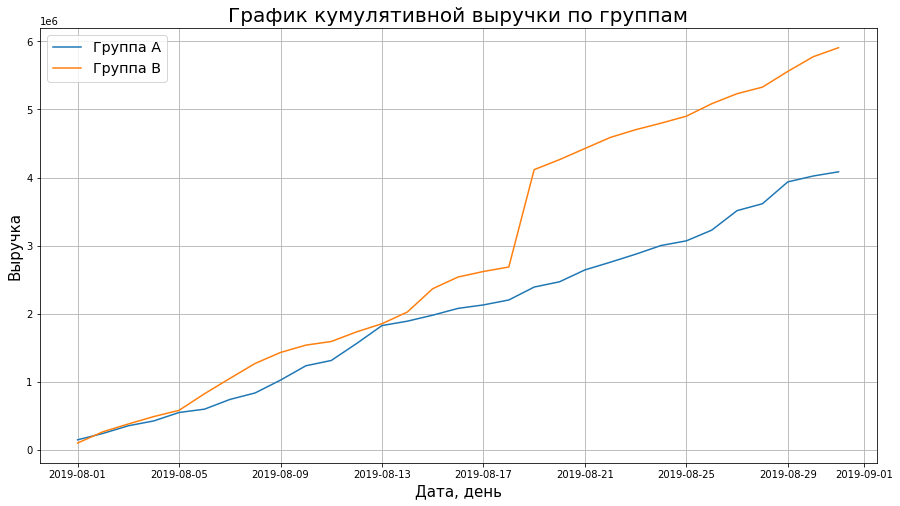

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа А')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')

plt.title('График кумулятивной выручки по группам', size=20)
plt.xlabel('Дата, день', size=15)
plt.ylabel('Выручка', size=15)
plt.legend(fontsize='x-large')
plt.grid()
plt.show()
# график

**Вывод:**

В обеих группах теста видим увеличение выручки с течением времени. В группе B наблюдается резкий скачек вверх 18-08-2019. Возможно в этот день был прирост числа заказов либо появились заказы с высокой стоимостью.

#### График кумулятивного среднего чека по группам

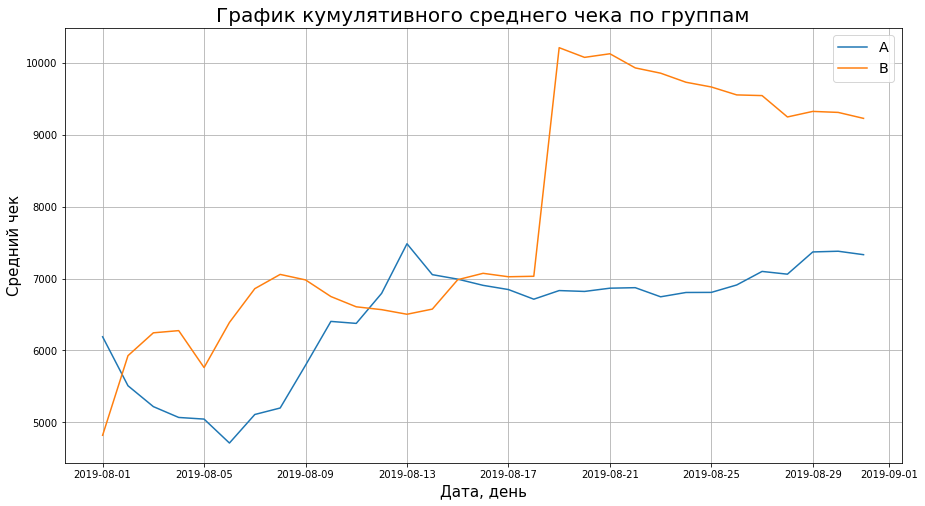

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам', size=20)
plt.xlabel('Дата, день', size=15)
plt.ylabel('Средний чек', size=15)
plt.legend(fontsize='x-large')
plt.grid()
plt.show()
# график

**Вывод:**

Значение среднего чека для обоих групп довольно нестабильно. Для группы B видим, что 18.08.2019 произошел резкий скачок, как и на предыдущем графике, что скорее всего озночает, что был очень крупный заказ по стоимости. Далее средний чек идет на спад.

Что касается группы А, то пик был 13.08.2019 со значением примерно 7800. Далее так же пошел спад

#### График относительного изменения кумулятивного среднего чека группы B к группе A

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',
                                                   how='left', suffixes=['A', 'B'])
# объединим данные таблицы cumulativeRevenueA и cumulativeRevenueB

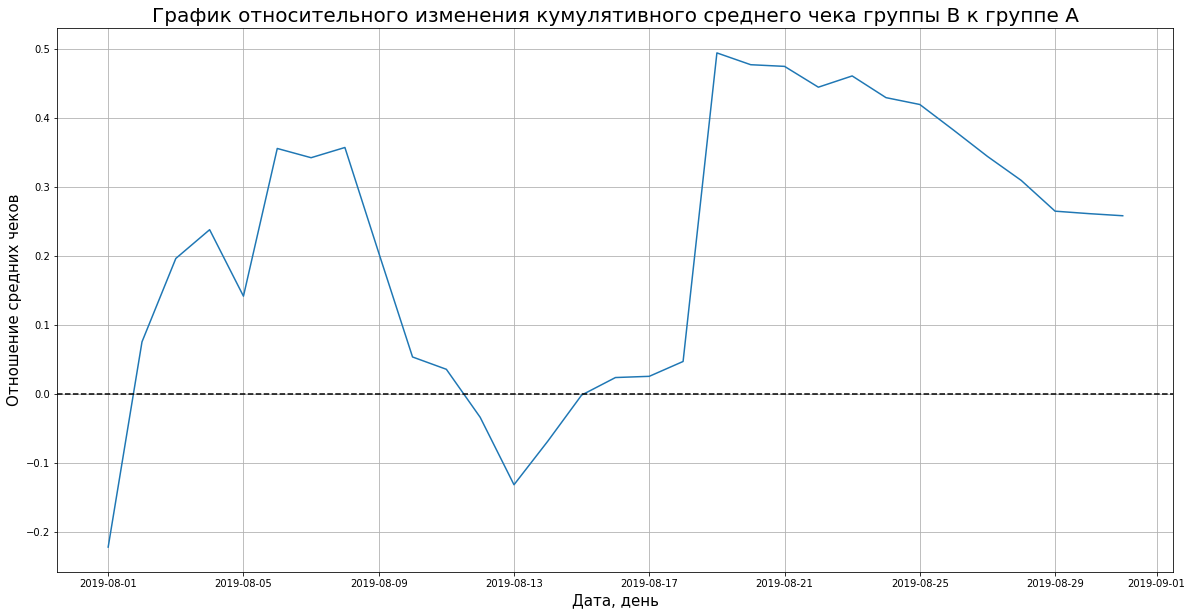

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
             mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', size=20)
plt.xlabel('Дата, день', size=15)
plt.ylabel('Отношение средних чеков', size=15)
plt.grid()
plt.show()
# график

**Вывод:**

Результы теста значительно менялись в несколько дат. Видимо именно тогда были совершены аномальные заказы.
Явный спад заметен 08.08.2019, а скачок пришолся на 18.08.2019, что подтверждается двумя предыдущими графиками. В этот день был явно совершен крупный заказ.

#### График кумулятивной конверсии по группам

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отношение числа заказов к количеству пользователей

In [ ]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# данные о заказах в сегментах A и B 

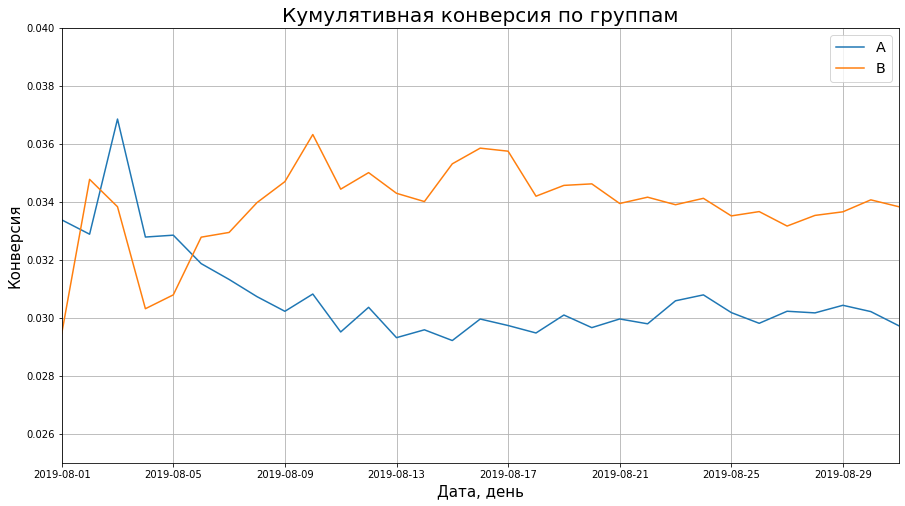

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend(fontsize='x-large')
plt.title("Кумулятивная конверсия по группам",size=20)
plt.xlabel('Дата, день', size=15)
plt.ylabel('Конверсия', size=15)

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.025, 0.04])
plt.grid()
plt.show()
# график

**Вывод:**

До 5 августа данные колебаются. Но затем конверсия группы В вырывается в лидеры и фиксируется около одного значения. Так же по группе А - с 9 Августа она зафиксировалась на одном значении (примерно 0.03)

#### График относительного изменения кумулятивной конверсии группы B к группе A

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# объединим данные таблицы cumulativeRevenueA и cumulativeRevenueB

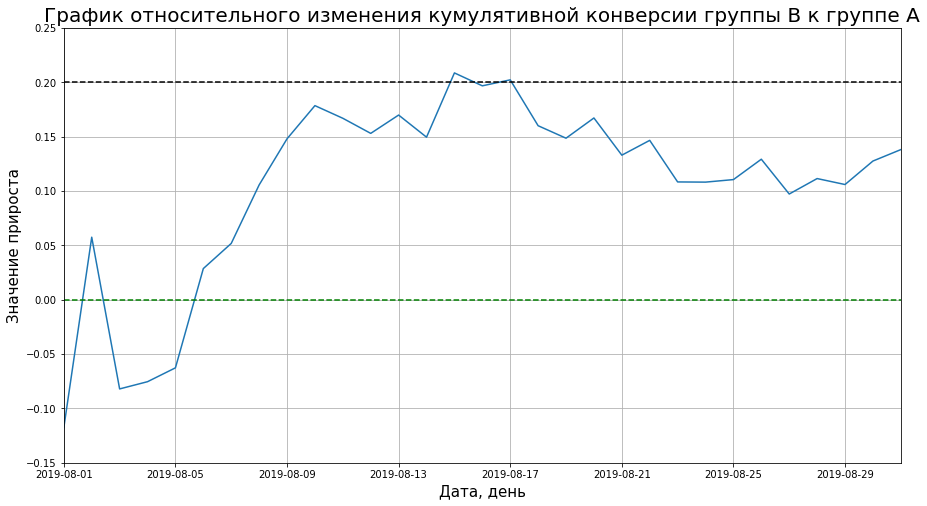

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='green', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.15, 0.25])

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', size=20)
plt.xlabel('Дата, день', size=15)
plt.ylabel('Значение прироста', size=15)
plt.grid()
plt.show()
# график

**Вывод:**

С 6 августа группа B уверенно лидирует по конверсии. Был пик около прироста в 20% 15 августа относительно группы А.

#### Вывод:

Были исследованы кумулятивные метрики:

* Построен график кумулятивной выручки по группам.
* Построен график кумулятивного среднего чека по группам.
* Построен график относительного изменения кумулятивного среднего чека группы B к группе A. 
* Построен график кумулятивной конверсии по группам. 
* Построен график относительного изменения кумулятивной конверсии группы B к группе A.

### Анализ выбросов и всплесков

#### График количества заказов по пользователям

In [ ]:
ordersByUsers  = orders.drop(['group', 'revenue', 'date'], 
                             axis=1).groupby('userId', as_index=False).agg({'orderId': 'nunique'})

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values('orders', ascending=False)
# число заказов по пользователям — датафрейм c двумя столбцами: 'userId' и 'orders'

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


In [ ]:
ordersByUsers['orders'].describe()
# информация о среднем значении

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

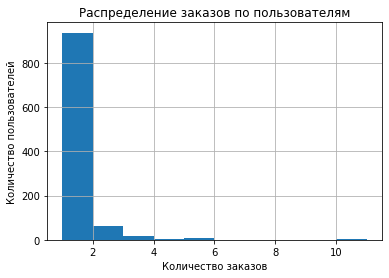

In [ ]:
plt.hist(ordersByUsers['orders'])

plt.title('Распределение заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()
# гистограмма

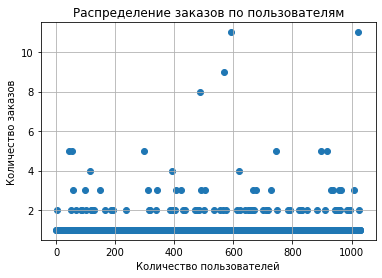

In [ ]:
x_values = pd.Series(range(0, len(ordersByUsers)))
# сгенерированные номера наблюдений

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Распределение заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()
# scatter

**Вывод:**

Большинство пользователей совершили всего 1 заказ. Пользователей, заказавших более 2 раз мало. Они могут быть аномальными. Далее посчитаем выборочные перцентили и ответим на данный вопрос.

#### 95-й и 99-й перцентили количества заказов на пользователя.  Граница для определения аномальных пользователей

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95,99]))
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили

[2. 4.]


**Вывод:**

Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов.

#### График стоимостей заказов

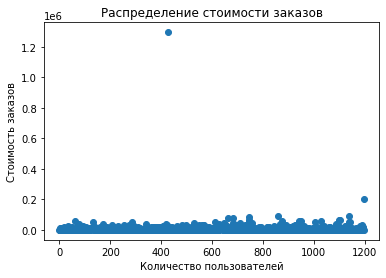

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.title('Распределение стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.show()
# scatter без фильтра

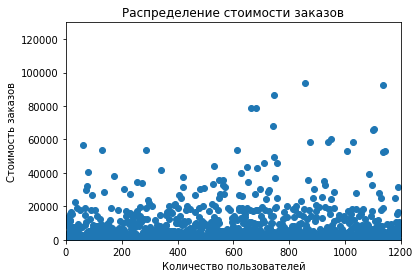

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.title('Распределение стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.axis([0, 1200, 0, 130000])

plt.show()
# scatter

**Вывод:**

Есть выбросы от 40 до 100 тысяч. Таких заказов не много. Посмотрим на перцентили

#### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Вывод:**

Не более, чем у 5% заказов чек дороже 28000. И не больше, чем у 1% заказов чек дороже 58233.

#### Вывод:

На данном эиапе мы изучили аномалии по количеству и стоимости заказов. Было сделано:

* Построен точечный график количества заказов по пользователям
* Посчитан 95-й и 99-й перцентили количества заказов на пользователя
* Построен точечный график стоимостей заказов
* Посчитан 95-й и 99-й перцентили стоимости заказов

### Проведение тестов

#### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

# сформировали новый датафрейм с кумулятивными данными о заказах и выручке групп А и В

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A
* `ordersPerDateB` — количество заказов в выбранную дату в группе B
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B
* `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A
* `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A
* `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B
* `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B
* `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A
* `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B

Создадим переменные `ordersByUsersA` и `ordersByUsersB`

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
# для пользователей группы А, которые заказывали хотя бы 1 раз, указываем число совершённых заказов

In [ ]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
# для пользователей группы В, которые заказывали хотя бы 1 раз, указываем число совершённых заказов

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [ ]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

In [ ]:
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)

**Сформулируем гипотезы:**

* `Н0` - Конверсия в группе A равна конверсии в группе B

* `Н1` - Конверсия в группе A не равна конверсии в группе B

Метод, который будем применять для A/B-тестирования, называется **непараметрический тест Уилкоксона-Манна-Уитни(stats.mannwhitneyu())**


Пороговое значение alpha примем за 5%.

In [ ]:
print('pvalue =', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии группы B =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
# тест и относительный прирост

pvalue = 0.01679
Относительный прирост конверсии группы B = 0.138


**Вывод:**

P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных показывает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы А равен 14%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем гипотезы:**

* `Н0` - Средний чек A равен среднему чеку группы B

* `Н1` - Средний чек A не равен среднему чеку группы B

In [ ]:
print('pvalue =', '{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                      orders[orders['group']=='B']['revenue'])[1]))

print('Относительный прирост среднего чека группы B =', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
# тест и относительный прирост

pvalue = 0.72929
Относительный прирост среднего чека группы B = 0.259


**Вывод:**

P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Принимаем гипотезу.

Кроме того, относительное различие среднего чека между сегментами = 25.9%, это много. Вероятнее всего, тут аномалии с двух сторон

#### Очистка данных от аномалий

* 95 и 99 перцентили средних чеков равны 28000 и 58233 рублям. 
* 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил более 2 заказа и более или совершил заказ на сумму свыше 28 000 рублей.

Сделаем срезы пользователей с числом заказов 2 и более — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
# срез пользователей по числу заказов

In [ ]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
# срез пользователей по сумме заказа

In [ ]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)
# объединили в таблице, удалили дубликаты

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: userId, dtype: int64

In [ ]:
abnormalUsers.shape
# количесвто аномальных пользователей

(74,)

Объявим переменные `sampleAFiltered` и `sampleBFiltered`, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

**Сформулируем гипотезы:**

* `Н0` - Конверсия в группе A равна конверсии в группе B

* `Н1` - Конверсия в группе A не равна конверсии в группе B

In [ ]:
print('pvalue =','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительный прирост конверсии группы B =','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
# тест и относительный прирост

pvalue = 0.01304
Относительный прирост конверсии группы B = 0.173


**Вывод:**

Как и в случае с сырыми данными, статистическая значимость достигнута. Отвергаем нулевую гипотезу. Сегмент B лучше сегмента А. Относительный прирост конверсии очищенной группы B к А увеличился на 3% и равен 17%

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Сформулируем гипотезы:**

* `Н0` - Средний чек A равен среднему чеку группы B

* `Н1` - Средний чек A не равен среднему чеку группы B

In [ ]:
print('pvalue =',
    '{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B =',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)
# тест и относительный прирост

pvalue = 0.73848
Относительный прирост среднего чека группы B = -0.020


**Вывод:**

После очистки данных от аномалий pvalue по среднему чеку не изменился т.е. статистически значимых отличий между группами нет. Относительное различие среднего чека группы В относительно группы А, после очистки данных упало более чем на 25%. И составляет всего 2% в пользу группы А. Отвергаем нулевую гипотезу.

#### Вывод:

после проведения А/В теста можно сделать выводы:

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после очещения от аномалий.
* Как по сырым, так и по очищенным данным - нет статистически значимого различия по среднему чеку между группами

### Решение по результатам A/B теста

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Средний чек не поменялся, а конверсия выросла. Группа В лучше чем А, так как конверсия больше, при одинаковом среднем чеке, соответственно группа В приносит больше денежных средств бизнесу. Перейти к проверке следующей гипотезы

## Вывод:

В результате работы было выполнено следующее:

1.  Загрузили необходимые для анализа данные


2.  Провели преобработку данных


3. Провели приоритизацию гипотез:
   * применили флеймворк ICE
   * применили флеймворк RICE
   * указали, как изменилась приоритизация гипотез
   
   
3. Исследовали кумулятивные метрики
   * построен график кумулятивной выручки по группам
   * построен график кумулятивного среднего чека по группам.
   * построен график относительного изменения кумулятивного среднего чека группы B к группе A
   * построен график кумулятивной конверсии по группам
   * построен график относительного изменения кумулятивной конверсии группы B к группе A


4. Проанализировали выбросы и всплески
    * построен точечный график количества заказов по пользователям
    * посчитан 95-й и 99-й перцентили количества заказов на пользователя
    * построен точечный график стоимостей заказов
    * посчитан 95-й и 99-й перцентили стоимости заказов
   
   
5. Провели статистические тесты

Итог:

* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
* Как по сырым, так и по отфильтрованным данным - нет статистически значимого различия по среднему чеку между группами 
* Тест признать успешным. Признать победу группы В